In [148]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [149]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [150]:
X

array([[-1.90970359, -0.89264677],
       [-0.70964306, -1.93285531],
       [ 5.96519812, -2.80144701],
       ...,
       [ 8.45955067, -2.89079239],
       [-3.61093222, -1.67692136],
       [ 7.59740282, -2.97027498]])

In [151]:
y

array([1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2,
       1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1,
       0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1,
       2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,

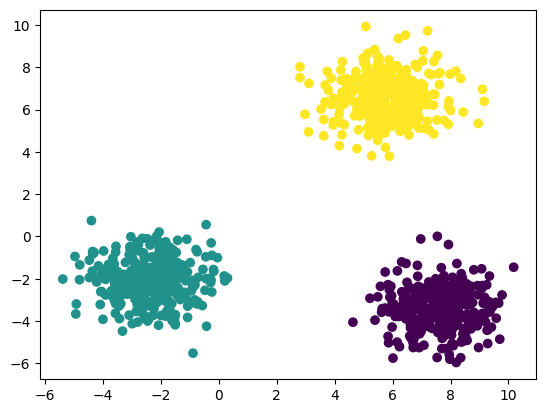

In [152]:
plt.scatter(X[:,0],X[:,1],c=y)

In [153]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [156]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [157]:
from sklearn.cluster import KMeans

In [158]:
## Elbow method To select K Value
wcss=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [159]:
wcss

[1340.0000000000014,
 630.5109866959167,
 68.42475354121302,
 60.26608889976477,
 53.414206456659684,
 48.79413938661015,
 43.4227275417674,
 35.13658818133951,
 32.552029012924244,
 30.67411341947273,
 26.548790513830152,
 24.594474325759748,
 22.17715954968823,
 22.280086481808674,
 20.013729776491516,
 19.809014238305515,
 17.89993833333273,
 17.98952103809967,
 16.170087263307803]

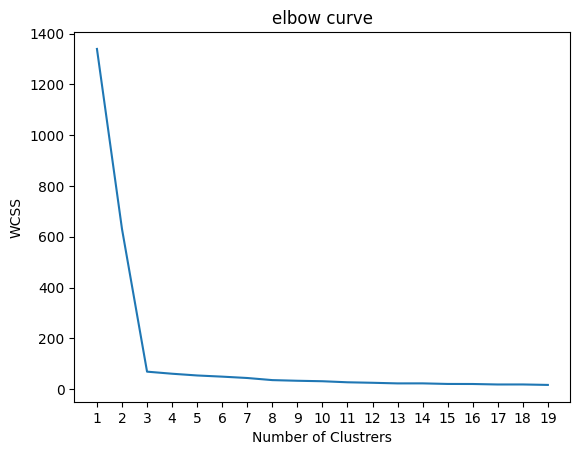

In [160]:
## plot elbow curve
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.title('elbow curve')
plt.show()

In [161]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [162]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1,
       2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0,

In [163]:
y_pred=kmeans.predict(X_test_scaled)

In [164]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2,
       2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2,
       1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2,
       1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0,
       2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1,

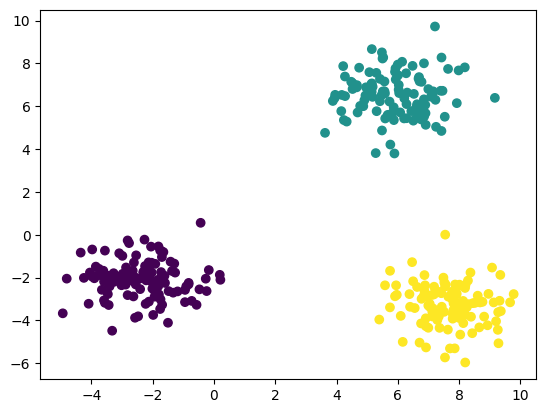

In [165]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [166]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [167]:
# pip install kneed

In [168]:
from kneed import KneeLocator

In [169]:
kl=KneeLocator(range(1,20),wcss,curve="convex",direction="decreasing")

In [170]:
kl.elbow

3

In [171]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [172]:
silhouette_coefficients=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [173]:
silhouette_coefficients

[0.5750851938339177,
 0.8188576650172278,
 0.6505102937289485,
 0.48001777036227045,
 0.4877226049232129,
 0.4891419365566644,
 0.336504194463809,
 0.3214289571284436,
 0.34502255095762524,
 0.33745113943847826,
 0.34327484523391066,
 0.3137398123207028,
 0.32153426319688877,
 0.32815640972911636,
 0.3246865407771965,
 0.3160700714255172,
 0.3366960663742444,
 0.33712535899125634]

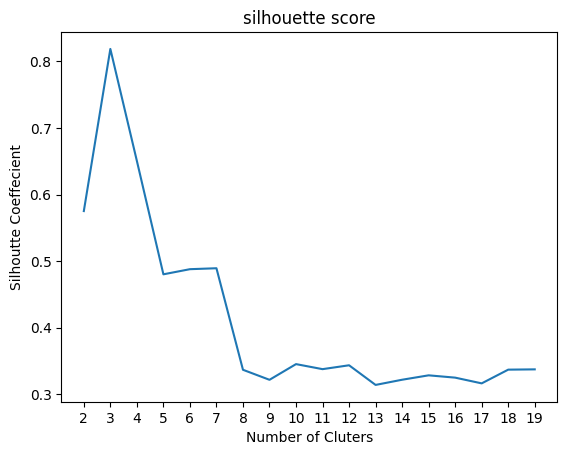

In [174]:
## plotting silhouette score
plt.plot(range(2,20),silhouette_coefficients)
plt.xticks(range(2,20))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.title("silhouette score")
plt.show()